In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

###

from tqdm import tqdm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge


### Custom utils. You can look here https://github.com/Nimrais/Linear_Regression
from bias_varience_decomp import bias_variance_decomp, bias_variance_plot
from utils import generate_poly_features, summary_model

### Vizualization
from IPython.display import Image
from IPython.core.display import HTML
from matplotlib.pyplot import figure
import bb_utils
import pyperclip
import warnings

In [2]:
#https://scikit-learn.org/stable/datasets/toy_dataset.html
boston = load_boston()
target, target_name = boston.target, "MEDV"
boston = pd.DataFrame(boston.data, columns = boston.feature_names)
boston[target_name] = target

# A matrix form for regression coeficients

## OLS

In [13]:
Image(url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTc_K85yjHd9xyEj46ULqK3FSbwRYdENRb3Yg&usqp=CAU", width=500, height=120)

In [44]:
X = np.random.rand(10, 5)
y = np.random.rand(10, 1)

np.linalg.inv(X.T @ X) @ X.T @ y

array([[ 0.35555531],
       [ 0.04590958],
       [ 0.8515717 ],
       [ 0.62033722],
       [-0.73785739]])

## Ridge regression

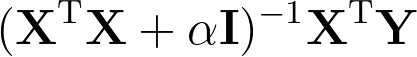

In [22]:
Image(filename="/Users/mykola/tmp/images/ridge.png", width=300, height=60)

# Linear Regression

In [20]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

## Correlation Matrix

<AxesSubplot:>

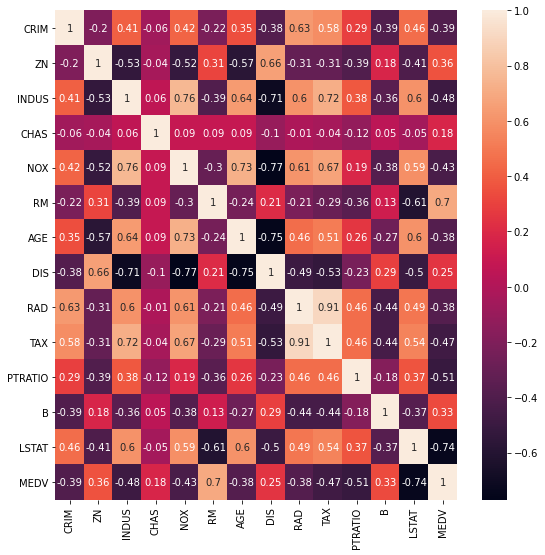

In [28]:
correlation_matrix = boston.corr().round(2)
fig, ax = plt.subplots(figsize=(9,9))  
sns.heatmap(data=correlation_matrix, annot=True)

## How to fit a model?

In [21]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

## What about the model summary?

In [22]:
summary_model(lin_model, "training set", X_train, y_train)
summary_model(lin_model, "testing set", X_test, y_test)

est = sm.OLS(y_train, sm.add_constant(X_train))
est = est.fit()
print(est.summary())

The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     341.5
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           2.55e-87
Time:                        19:13:50   Log-Likelihood:                -1271.9
No. Observations:                 404   AIC:                             2550.
Df Residuals:                     401   BIC:                             2562.
Df Model:                           2                                         
Covariance Type:

# Ridge Regression

## Fit a ridge regressor for Boston dataset

In [24]:
x_cols = [col for col in boston.columns if col != 'MEDV']
X = pd.DataFrame(np.stack([boston[col] for col in x_cols], axis=1), columns = x_cols)
y = boston['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)


In [28]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
# model evaluation for training set
y_train_predict = ridge_model.predict(X_train)

summary_model(ridge_model, "training set", X_train, y_train)
summary_model(ridge_model, "testing set", X_test, y_test)

The model performance for training set
--------------------------------------
RMSE is 4.757709204560646
R2 score is 0.7364918561980667


The model performance for testing set
--------------------------------------
RMSE is 4.647501515397158
R2 score is 0.7241256474733335




## Bias and Varience Trade-off

In [31]:
Image(url=
"https://cdn.analyticsvidhya.com/wp-content/uploads/2020/08/Copy-of-Add-a-subheading5.png", 
width=600, 
height=400)

100%|██████████| 20/20 [00:00<00:00, 26.08it/s]


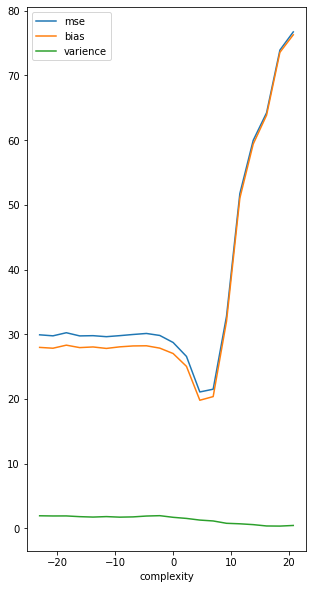

In [10]:
x_cols = [col for col in boston.columns if col != 'MEDV']
X = pd.DataFrame(np.stack([boston[col] for col in x_cols], axis=1), columns = x_cols)
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

alphas = [10**(i) for i in range(-10, 10)]

validation = X_train.to_numpy(), y_train.to_numpy(), X_val.to_numpy(), y_val.to_numpy()

def metrics_evaluation(alpha, validation):
    estimator = Ridge(alpha)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(estimator, *validation)
    return avg_expected_loss, avg_bias, avg_var

metrics = [metrics_evaluation(alpha,validation) for alpha in tqdm(alphas)]
bias_variance_plot(alphas, metrics, (5, 10))

## Polynomial Regression

In [7]:
x_cols = [col for col in boston.columns if col != 'MEDV']
boston_with_poly = generate_poly_features(boston, x_cols, max_degree=3)

x_poly_cols = [col for col in boston_with_poly.columns if col != 'MEDV']
X = pd.DataFrame(np.stack([boston_with_poly[col] for col in x_poly_cols], axis=1), columns = x_poly_cols)
y = boston_with_poly['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

100%|██████████| 20/20 [00:18<00:00,  1.06it/s]


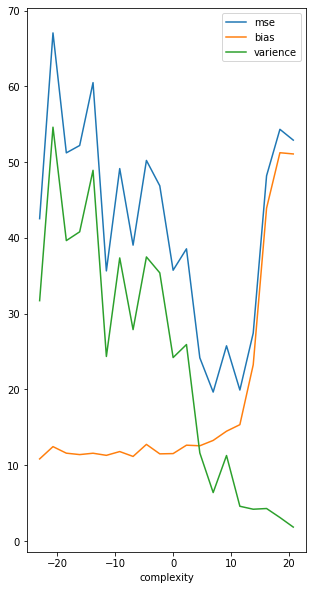

In [8]:
warnings.filterwarnings('ignore')
alphas = [10**(i) for i in range(-10, 10)]

validation = X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()

def metrics_evaluation(alpha, validation):
    estimator = Ridge(alpha)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(estimator, *validation)
    return avg_expected_loss, avg_bias, avg_var

metrics = [metrics_evaluation(alpha,validation) for alpha in tqdm(alphas)]
bias_variance_plot(alphas, metrics, (5, 10))